<a href="https://colab.research.google.com/github/minolinesith/FYP/blob/Ensemble-Model/Ensemble_model_averaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16

In [ ]:
train_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/validation'
test_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/test'

In [ ]:
img_width = 224
img_height = 224

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False,
)

valid_data = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False

)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False

)

Found 1601 files belonging to 8 classes.
Found 480 files belonging to 8 classes.
Found 80 files belonging to 8 classes.


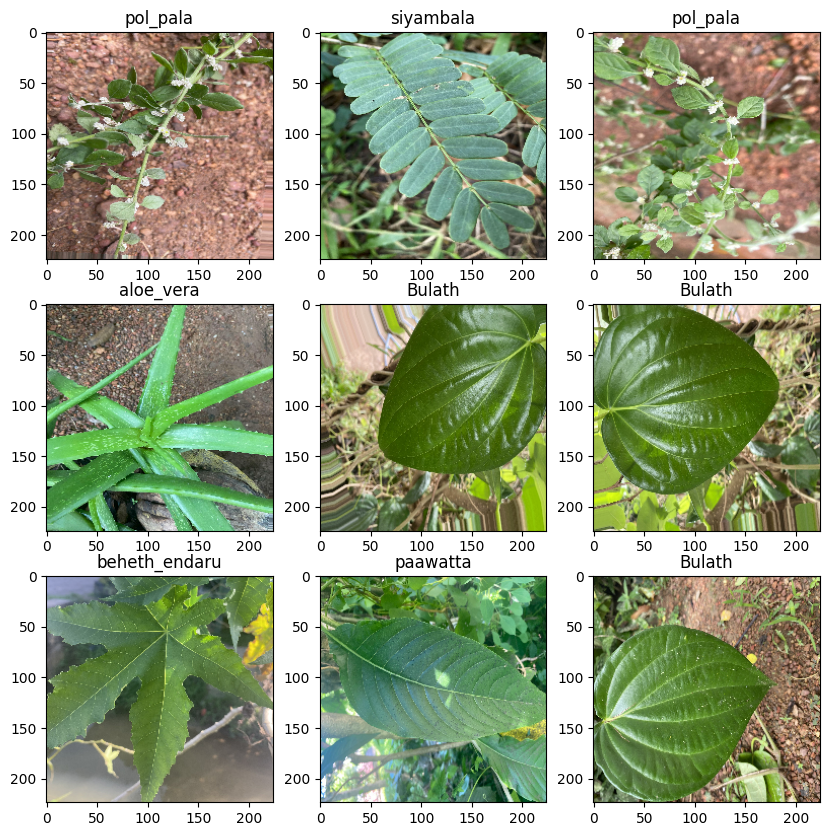

In [ ]:
plt.figure(figsize=(10,10))
for img, labels in train_data.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(img[i].numpy().astype('uint8'))
    plt.title(train_data.class_names[labels[i]])

# VGG16

In [ ]:
VGG16_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in VGG16_base_model.layers:
    layer.trainable = False

In [ ]:
vgg16_model = Sequential()
vgg16_model.add(VGG16_base_model)
vgg16_model.add(layers.Flatten())
vgg16_model.add(layers.Dense(512, activation='relu'))
vgg16_model.add(layers.Dropout(0.5))
vgg16_model.add(layers.Dense(8, activation ='softmax'))

In [ ]:
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epochs = 5
history = vgg16_model.fit(train_data, validation_data = valid_data, epochs = epochs)

Epoch 1/5
161/161 [==============================] - 283s 2s/step - loss: 2.3154 - accuracy: 0.8863 - val_loss: 0.0377 - val_accuracy: 0.9917
Epoch 2/5
161/161 [==============================] - 107s 637ms/step - loss: 0.2429 - accuracy: 0.9856 - val_loss: 0.0575 - val_accuracy: 0.9917
Epoch 3/5
161/161 [==============================] - 122s 737ms/step - loss: 0.2329 - accuracy: 0.9856 - val_loss: 0.0294 - val_accuracy: 0.9958
Epoch 4/5
161/161 [==============================] - 121s 735ms/step - loss: 0.1064 - accuracy: 0.9931 - val_loss: 0.1422 - val_accuracy: 0.9917
Epoch 5/5
161/161 [==============================] - 121s 734ms/step - loss: 0.1615 - accuracy: 0.9919 - val_loss: 0.0763 - val_accuracy: 0.9937


In [ ]:
test_loss, test_accuracy = vgg16_model.evaluate(test_data)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

8/8 [==============================] - 12s 1s/step - loss: 4.3331 - accuracy: 0.8000
Test Accuracy: 80.00%


In [ ]:
def predict_image(model, image):
  classes=train_data.class_names
  image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
  img_arr = tf.keras.utils.array_to_img(image)
  img_batch = tf.expand_dims(img_arr,0)
  predict = model.predict(img_batch)
  print('Leaf is of plant {} with an accuracy of {:0.2f}'.format(classes[np.argmax(predict)],np.max(predict)*100))

In [ ]:
image = 'IMG_1727.jpg'
predict_image(vgg16_model, image)

1/1 [==============================] - 0s 17ms/step
Leaf is of plant beheth_endaru with an accuracy of 96.94


# EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
efficientnet_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
for layer in efficientnet_base_model.layers:
    layer.trainable = False

In [ ]:
efficientnet_model = Sequential()
efficientnet_model.add(efficientnet_base_model)
efficientnet_model.add(layers.Flatten())
efficientnet_model.add(layers.Dense(512, activation='relu'))
efficientnet_model.add(layers.Dropout(0.5))
efficientnet_model.add(layers.Dense(8, activation ='softmax'))

In [ ]:
efficientnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epochs = 5
history = efficientnet_model.fit(train_data, validation_data = valid_data, epochs = epochs)

Epoch 1/5
161/161 [==============================] - 111s 620ms/step - loss: 1.1860 - accuracy: 0.9269 - val_loss: 0.0019 - val_accuracy: 0.9979
Epoch 2/5
161/161 [==============================] - 103s 613ms/step - loss: 0.4857 - accuracy: 0.9775 - val_loss: 0.1345 - val_accuracy: 0.9896
Epoch 3/5
161/161 [==============================] - 103s 619ms/step - loss: 0.4348 - accuracy: 0.9825 - val_loss: 0.0423 - val_accuracy: 0.9979
Epoch 4/5
161/161 [==============================] - 100s 601ms/step - loss: 0.5133 - accuracy: 0.9838 - val_loss: 1.2839e-04 - val_accuracy: 1.0000
Epoch 5/5
161/161 [==============================] - 104s 624ms/step - loss: 0.2862 - accuracy: 0.9925 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [ ]:
test_loss, test_accuracy = efficientnet_model.evaluate(test_data)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

8/8 [==============================] - 5s 612ms/step - loss: 0.2534 - accuracy: 0.9875
Test Accuracy: 98.75%


In [ ]:
test_loss, test_accuracy = efficientnet_model.evaluate(test_data_2)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

8/8 [==============================] - 13s 2s/step - loss: 127.1542 - accuracy: 0.4667
Test Accuracy: 46.67%


In [ ]:
image = 'tamarind.jpg'
predict_image(efficientnet_model, image)

1/1 [==============================] - 0s 25ms/step
Leaf is of plant siyambala with an accuracy of 100.00


# InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
inceptionV3_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [ ]:
for layer in inceptionV3_base_model.layers:
    layer.trainable = False

In [ ]:
inceptionV3_model = Sequential()
inceptionV3_model.add(inceptionV3_base_model)
inceptionV3_model.add(layers.Flatten())
inceptionV3_model.add(layers.Dense(512, activation='relu'))
inceptionV3_model.add(layers.Dropout(0.5))
inceptionV3_model.add(layers.Dense(8, activation ='softmax'))

In [ ]:
inceptionV3_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epochs = 5
history = inceptionV3_model.fit(train_data, validation_data = valid_data, epochs = epochs)

Epoch 1/5
161/161 [==============================] - 112s 634ms/step - loss: 1.0278 - accuracy: 0.9194 - val_loss: 0.0587 - val_accuracy: 0.9958
Epoch 2/5
161/161 [==============================] - 101s 606ms/step - loss: 0.4827 - accuracy: 0.9769 - val_loss: 0.1304 - val_accuracy: 0.9833
Epoch 3/5
161/161 [==============================] - 101s 601ms/step - loss: 0.3477 - accuracy: 0.9825 - val_loss: 0.0974 - val_accuracy: 0.9896
Epoch 4/5
161/161 [==============================] - 123s 745ms/step - loss: 0.3618 - accuracy: 0.9888 - val_loss: 0.2459 - val_accuracy: 0.9833
Epoch 5/5
161/161 [==============================] - 100s 600ms/step - loss: 0.1016 - accuracy: 0.9944 - val_loss: 0.0824 - val_accuracy: 0.9917


In [ ]:
test_loss, test_accuracy = inceptionV3_model.evaluate(test_data)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

8/8 [==============================] - 4s 479ms/step - loss: 4.3405 - accuracy: 0.8625
Test Accuracy: 86.25%


In [ ]:
image = 'IMG_1842.jpg'
predict_image(inceptionV3_model, image)

1/1 [==============================] - 2s 2s/step
Leaf is of plant wata_endaru with an accuracy of 100.00


# Ensemble Model - Averaging

In [ ]:
from tensorflow.keras.layers import Average

models = [vgg16_model, efficientnet_model, inceptionV3_model]


model_input = tf.keras.Input(shape=(img_width, img_height, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)


In [ ]:
model_input = keras.Input(shape=(img_width,img_height,3))
models_output=[model(model_input) for model in models]
average_output=layers.average(models_output)

for model in models:
  for layer in model.layers:
      layer.trainable = False

ensemble_model=keras.Model(inputs=model_input,outputs=average_output)



In [ ]:
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epochs = 3
history = ensemble_model.fit(train_data, validation_data = valid_data, epochs = epochs)

Epoch 1/3
161/161 [==============================] - 116s 617ms/step - loss: 0.0091 - accuracy: 0.9994 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 2/3
161/161 [==============================] - 104s 616ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 3/3
161/161 [==============================] - 123s 745ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000


In [ ]:
test_loss, test_accuracy = ensemble_model.evaluate(test_data)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

8/8 [==============================] - 7s 875ms/step - loss: 0.1525 - accuracy: 0.9875
Test Accuracy: 98.75%


In [ ]:
image = 'IMG_2294.jpg'
predict_image(ensemble_model, image)

1/1 [==============================] - 0s 53ms/step
Leaf is of plant aloe_vera with an accuracy of 100.00


In [ ]:
train_data.class_names

['Bulath',
 'Cinnamon',
 'aloe_vera',
 'beheth_endaru',
 'paawatta',
 'pol_pala',
 'siyambala',
 'wata_endaru']

In [ ]:
model.save('LifeVeda_Ensemble_averaging.keras')